In [2]:
#Qiskit Advocate Questions
#Questions related to Qiskit Terra
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
import numpy as np
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram, plot_state_city, plot_state_qsphere, plot_state_hinton, plot_state_paulivec, plot_bloch_multivector
import math

# Loading your IBM Q account(s)
provider = IBMQ.load_account()
q_simulator = Aer.get_backend('qasm_simulator')
u_simulator = Aer.get_backend('unitary_simulator')
s_simulator = Aer.get_backend('statevector_simulator')

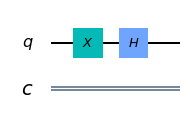

In [23]:
#1. What is the output of the following circuit?
circuit = QuantumCircuit(1, 1)
circuit.x(0)
circuit.h(0)
circuit.draw(output='mpl')

A. <img src="http://latex.codecogs.com/svg.latex?\vert0\rangle" border="0"/><br>
B. <img src="http://latex.codecogs.com/svg.latex?\frac{\vert0\rangle+\vert1\rangle}{\sqrt{2}}" border="0"/><br>
C. <img src="http://latex.codecogs.com/svg.latex?\frac{\vert0\rangle-\vert1\rangle}{\sqrt{2}}" border="0"/><br>
D. Both 2 & 3 are possible<br>
E. None of the above

In [25]:
usim_result = execute(circuit, backend=u_simulator).result()
ssim_result = execute(circuit, backend=s_simulator).result()
print(usim_result.get_unitary(circuit,decimals=3))
print(ssim_result.get_statevector())

[[ 0.707-0.j  0.707+0.j]
 [-0.707+0.j  0.707+0.j]]
[ 0.70710678-8.65956056e-17j -0.70710678+8.65956056e-17j]


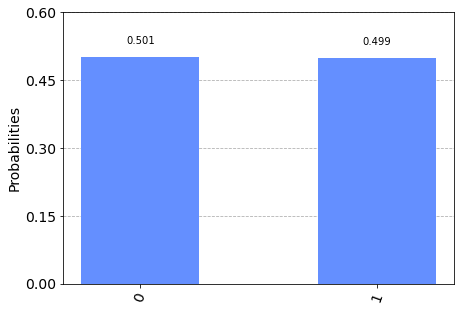

In [6]:
circuit.measure([0], [0])
qsim_result = execute(circuit, backend=q_simulator, shots=1024).result()
plot_histogram(qsim_result.get_counts(circuit))

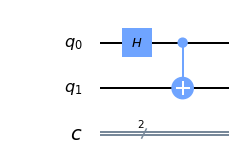

In [12]:
#2. What is the result of the measurements in the following circuit 
#assuming error-free quantum computation?
#50% 0 and 50% 1
#50% 00 and 50% 11
#100% 1
#Both 1 & 2 are possible
#None of the above
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
#circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

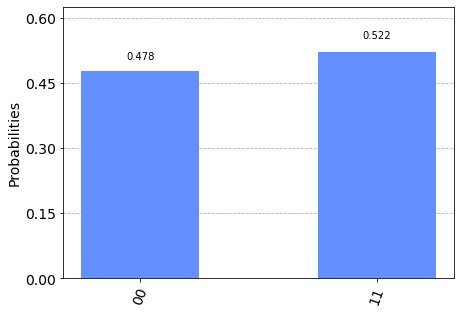

In [25]:
qsim_result = execute(circuit, backend=q_simulator, shots=1024).result()
plot_histogram(qsim_result.get_counts())

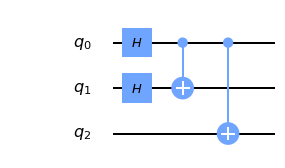

In [27]:
#3.Consider the three-qubit quantum circuit below. 
#What are the real and imaginary components of the state vector?
#<img align="middle" src="questions/qiskitintro_images/question.png" width=300px>
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.h(1)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.draw()

#<img src="questions/qiskitintro_images/1.png">
#<img src="questions/qiskitintro_images/2.png">
#<img src="questions/qiskitintro_images/3.png">
#<img src="questions/qiskitintro_images/4.png">
#None of the above

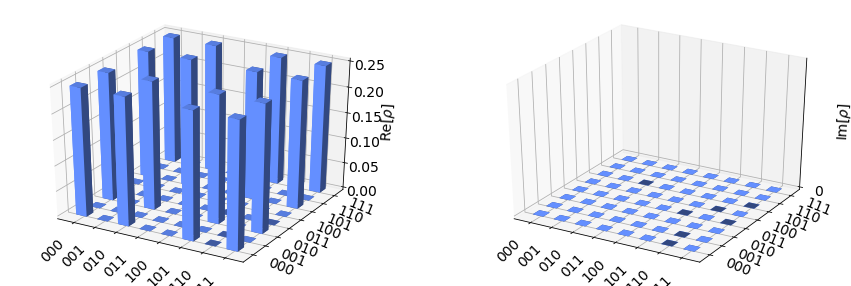

In [29]:
s_results = execute(circuit, backend=s_simulator).result()
psi = s_results.get_statevector()
plot_state_city(psi)

Question ID: 5<br>
Which one of the following gates is different from the rest?<br>
1)U1Gate(pi)<br>
2)U2Gate(0, pi)<br>
3)U3Gate(pi/2, 0, pi)<br>
4)HGate()<br>
5)None of the above

[1.+0.j 0.+0.j]


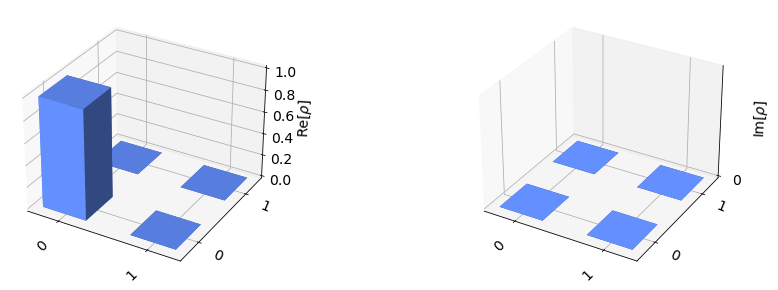

In [7]:
circuit = QuantumCircuit(1,1)
circuit.u1(math.pi, 0)
s_results = execute(circuit, backend=s_simulator).result()
psi = s_results.get_statevector()
print(psi)
plot_state_city(psi)

[0.70710678+0.j 0.70710678+0.j]


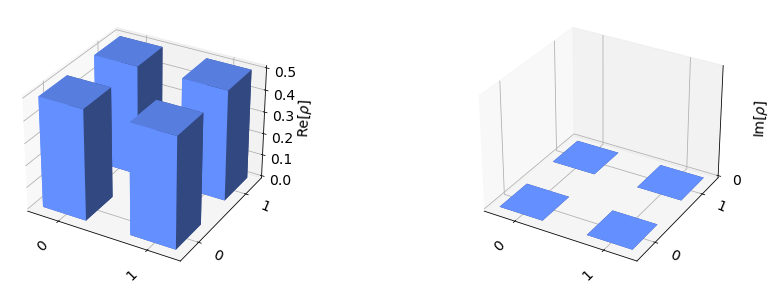

In [8]:
circuit = QuantumCircuit(1,1)
circuit.u2(0,math.pi,0)
s_results = execute(circuit, backend=s_simulator).result()
psi = s_results.get_statevector()
print(psi)
plot_state_city(psi)

[0.70710678+0.j 0.70710678+0.j]


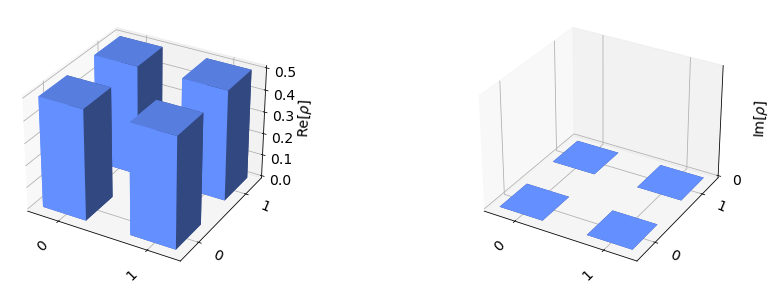

In [10]:
circuit = QuantumCircuit(1,1)
circuit.u3(math.pi/2,0,math.pi,0)
s_results = execute(circuit, backend=s_simulator).result()
psi = s_results.get_statevector()
print(psi)
plot_state_city(psi)

[0.70710678+0.j 0.70710678+0.j]


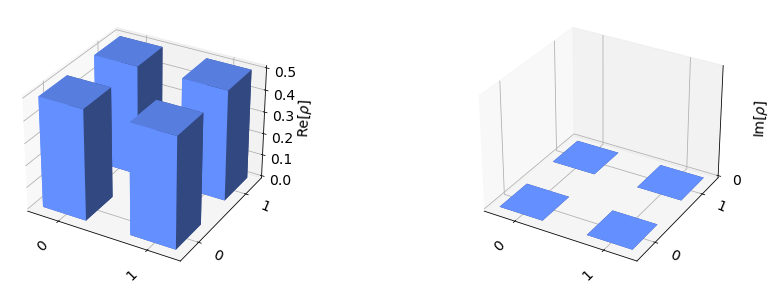

In [11]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
s_results = execute(circuit, backend=s_simulator).result()
psi = s_results.get_statevector()
print(psi)
plot_state_city(psi)

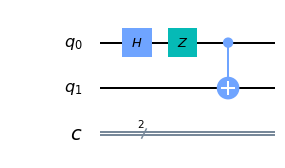

In [18]:
# Which of the following state visualization represent the same quantum state as shown in this qsphere? 
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.z(0)
circuit.cx(0,1)
#circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

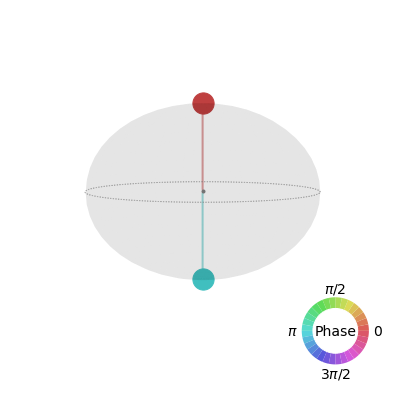

In [19]:
statevector = execute(circuit, backend=s_simulator).result()
plot_state_qsphere(statevector.get_statevector())

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (4).

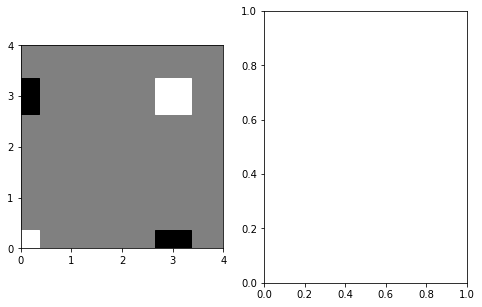

In [20]:
plot_state_hinton(statevector.get_statevector())

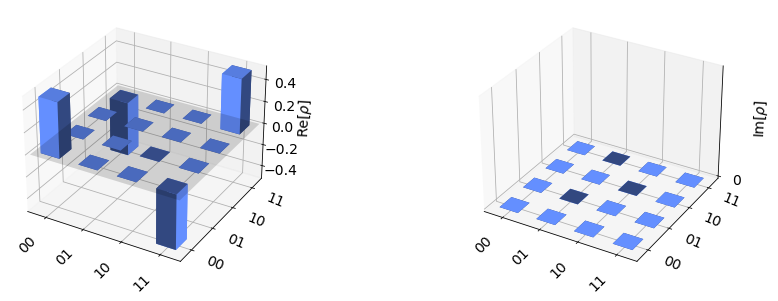

In [21]:
plot_state_city(statevector.get_statevector())

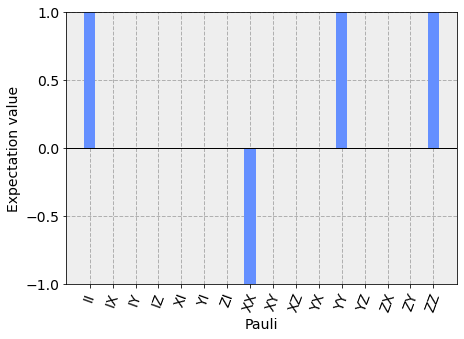

In [24]:
plot_state_paulivec(statevector.get_statevector())

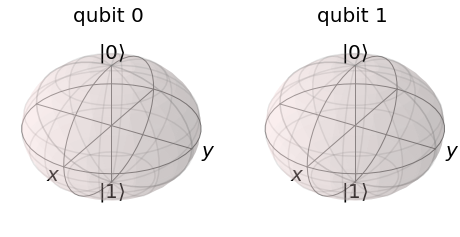

In [26]:
plot_bloch_multivector(statevector.get_statevector())